<a href="https://colab.research.google.com/github/Gu1Andrade/RAG-e-Agentes-de-IA/blob/main/Rag_Agentes_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -qU pypdf
%pip install -U langchain
%pip install -U langchain-community
%pip install -U langchain-groq
%pip install langchain-huggingface
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
from google.colab import userdata
import os
api_Key=userdata.get('GROQ_API_KEY')
os.environ['GROQ_API_KEY'] = api_Key

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(model='llama-3.3-70b-versatile')

In [ ]:
prompt = '''
  messages: Segundo a NASA quais seriam os beneficios coentificos de ir para Marte?
'''

In [ ]:
resposta = llm.invoke(prompt)

In [ ]:
resposta

AIMessage(content='A NASA e outras agências espaciais têm identificado vários benefícios científicos em enviar missões tripuladas para Marte. Aqui estão alguns dos principais benefícios científicos:\n\n1. **Entender a Origem da Vida**: Marte é considerado um candidato promissor para abrigar vida, seja no passado ou no presente. Uma missão tripulada poderia procurar por sinais de vida em Marte, o que ajudaria a responder à pergunta fundamental sobre a origem da vida no universo.\n2. **Geologia e Evolução Planetária**: Marte oferece uma oportunidade única para estudar a geologia e a evolução de um planeta que é semelhante à Terra, mas com condições muito diferentes. Isso pode ajudar a entender melhor a formação e a evolução de nosso próprio planeta.\n3. **Atmosfera e Clima**: A atmosfera de Marte é muito mais fina do que a da Terra, e o clima é muito mais extremo. Estudar a atmosfera e o clima de Marte pode ajudar a entender melhor os processos que controlam o clima em nosso próprio plan

In [ ]:
url = "https://www.nasa.gov/wp-content/uploads/2023/04/m2m_strategy_and_objectives_development.pdf"

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(url)

pages = []
for page in loader.lazy_load():
  pages.append(page)

In [ ]:
print(f'{pages[0].metadata}\n')

{'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 18.2 (Windows)', 'creationdate': '2023-04-06T17:28:28-04:00', 'moddate': '2023-04-06T17:29:25-04:00', 'trapped': '/False', 'source': 'https://www.nasa.gov/wp-content/uploads/2023/04/m2m_strategy_and_objectives_development.pdf', 'total_pages': 78, 'page': 0, 'page_label': '1'}



In [ ]:
print(pages[0].page_content)

NASA’S 
MOON TO MARS 
STRATEGY AND 
OBJECTIVES 
DEVELOPMENT
A blueprint for sustained 
human presence and 
exploration throughout 
the Solar System
National Aeronautics and
Space Administration


In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
embed_model = HuggingFaceEmbeddings(model_name='mixedbread-ai/mxbai-embed-large-v1')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [ ]:
vector_store = InMemoryVectorStore.from_documents(pages, embed_model)

In [ ]:
docs = vector_store.similarity_search("Objectives Development Process",k=2)

In [ ]:
for doc in docs:
  print(f'Page {doc.metadata["page"]}: {doc.page_content[:300]}\n')

Page 42: APPENDIX B: OBJECTIVES DEVELOPMENT PROCESS
In accordance with the methodology principle of Architect from the Right, in November 2021, the NASA Executive Council 
tasked the mission directorates to draft a set of top-level goals and objectives necessary to achieve the Moon to Mars 
endeavor. The tas

Page 13: objective-baSed approach architect From the riGht / execute From the leFt
Architect from the right 
– work backwards from 
the defined goal and 
establish a complete set 
of elements that will be 
required for success.
NASA’s Moon to Mars strategy is guided by both a robust systems engineering proce



In [ ]:
retriver = vector_store.as_retriever()

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
template = """
  You're z helpful assisant only gives anwers bases on the given context. If the answer is not in the, say "I don't know".
Context: {context}

Question: {question}

"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [ ]:
chain = (
    {"context": retriver, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
from IPython.display import display, Markdown

In [ ]:
response = chain.invoke("What are the Objectives Development Process")
display(Markdown(response))

The Objectives Development Process is described in Appendix B. It started in November 2021 when the NASA Executive Council tasked the mission directorates to draft a set of top-level goals and objectives necessary to achieve the Moon to Mars endeavor. The process involved:

1. Drafting top-level goals and objectives by the mission directorates.
2. Binning the goals and objectives into four distinct tracks: Science, Infrastructure, Transportation and Habitation, and Operations.
3. Reaching consensus on an initial draft set of 45 objectives by March 2022 through Federated Board processes.
4. Releasing the original nine goals and 50 draft objectives to the public and the NASA workforce in May 2022 for comments.
5. Receiving more than 5,000 inputs, which resulted in modification of many objectives and the addition of several new ones.
6. Holding consultation workshops with industry and international partners to refine the objectives and identify gaps.
7. Resulting in a revised 10 goals and 63 final objectives that reflect a matured strategy for NASA and its partners.

In [ ]:
from langchain_core.tools import tool

In [ ]:
@tool
def pega_contexto(query: str) -> str:
  """Pega o contexto baseado em uma pesquisa. """
  retriever = vector_store.as_retriever()
  resultado = retriver.invoke(query)
  return resultado

In [ ]:
vector_store_agriculture = carrega_pdf("https://www.bibliotecaagptea.org.br/agricultura/agricultura_geral/livros/AGRICULTURA%20GERAL%20-%20APOSTILA.pdf")

In [ ]:
vector_store_dengue = carrega_pdf("https://www.ecdc.europa.eu/sites/default/files/documents/DENGUE_AER_2020_Report%20-%20final.pdf")

In [ ]:
@tool
def pega_contexto_agriculture(query: str) -> str:
  """Pega o contexto baseado em uma pesquisa. """
  retriever = vector_store.as_retriever()
  resultado = retriver.invoke(query)
  return resultado

In [ ]:
@tool
def pega_contexto_dengue(query: str) -> str:
  """Pega o contexto baseado em uma pesquisa. """
  retriever = vector_store.as_retriever()
  resultado = retriver.invoke(query)
  return resultado

In [ ]:
tools = [pega_contexto, pega_contexto_agriculture, pega_contexto_dengue]

In [ ]:
pega_contexto_dengue.invoke("Cases of dengue we had since the beginning of 2025?")

[Document(id='bf793db6-225d-4d95-af69-39fa5396e4bd', metadata={'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 18.2 (Windows)', 'creationdate': '2023-04-06T17:28:28-04:00', 'moddate': '2023-04-06T17:29:25-04:00', 'trapped': '/False', 'source': 'https://www.nasa.gov/wp-content/uploads/2023/04/m2m_strategy_and_objectives_development.pdf', 'total_pages': 78, 'page': 46, 'page_label': '47'}, page_content='APPENDIX C: MAPPING SCIENCE GOALS AND  \nOBJECTIVES TO DECADAL SURVEYS\nNASA prioritizes science investigations based on recommendations laid out in community documents and/or internal \nroadmaps. The Science Mission Directorate (SMD) regularly engages with the National Academies of Sciences, Engineering, \nand Medicine (NASEM) to produce decadal research studies that are the basis for recommendations of top-priority \nscience areas for NASA investments in the upcoming decade. Each division of NASA’s SMD engages the NASEM in this \ndecadal survey process that outlines pri

In [ ]:
from langgraph.prebuilt import create_react_agent

In [ ]:
system_prompt = """You're a helpful assistant that only gives answers bases on the given context. If the answer is not in the context, say \"I don't know\"\n",
        "    - pega_contexto: Tool that returns the context based on the users query if the query is about NASA and space travels.\n",
        "    - pega_contexto_agriculture: Tool that returns the context based on the users query if the query is about agriculture.\n",
        "    - pega_contexto_dengue: Tool that returns the context based on the users query if the query is about dengue.\n",
"""

In [ ]:
agente_pdf = create_react_agent(model=llm, tools=tools,prompt=system_prompt)

In [ ]:
agente_pdf.invoke({"messages": [("user", "What are the Objectives Development Process?")]})

{'messages': [HumanMessage(content='What are the Objectives Development Process?', additional_kwargs={}, response_metadata={}, id='6940aed7-fcb8-42d4-8ad4-87edac037ad4'),
  AIMessage(content="I don't know", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 488, 'total_tokens': 493, 'completion_time': 0.007113885, 'prompt_time': 0.050415896, 'queue_time': 0.211776648, 'total_time': 0.057529781}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--588fd2db-8df5-4338-911b-58ec36e684bc-0', usage_metadata={'input_tokens': 488, 'output_tokens': 5, 'total_tokens': 493})]}

In [ ]:
resuktado= agente_pdf.invoke({"messages": [("user", "What causes dengue?")]})
resuktado

{'messages': [HumanMessage(content='What causes dengue?', additional_kwargs={}, response_metadata={}, id='911fa810-be83-467c-94c3-73b921e53893'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nwj0znqhg', 'function': {'arguments': '{"query":"dengue causes"}', 'name': 'pega_contexto_dengue'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 486, 'total_tokens': 509, 'completion_time': 0.048603135, 'prompt_time': 0.07107097, 'queue_time': 0.210245863, 'total_time': 0.119674105}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d8df18a1-ea27-4ec6-88c7-0f10baf9d0d1-0', tool_calls=[{'name': 'pega_contexto_dengue', 'args': {'query': 'dengue causes'}, 'id': 'nwj0znqhg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 486, 'output_tokens': 23, 'total_tokens': 509}),
  ToolMessage(content="[Document(id

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langchain_core.messages import HumanMessage, SystemMessage

In [ ]:
grafo = StateGraph(MessagesState)

In [ ]:
grafo.add_node("assistente", agente_pdf)
grafo.add_node("tools", ToolNode(tools))

In [ ]:
grafo.add_edge(START, "assistente")
grafo.add_conditional_edges("assistente",tools_condition)

In [ ]:
grafo.add_edge("tools", "assistente")

In [ ]:
grafo.add_edge("assistente", END)

In [ ]:
memoria = MemorySaver()
app = grafo.compile(checkpointer=memoria)

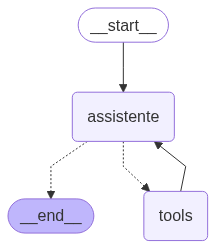

In [ ]:
Image(app.get_graph().draw_mermaid_png())

In [ ]:
from logging import config
def chat_com_memoria(mensagem_usuario: str, thread_id="1",verbose=False):
  config = {"configurable": {"thread_id": thread_id}}
  messages = app.invoke({"messages": [HumanMessage(content=mensagem_usuario)]}, config)
  if verbose:
    for message in messages['messages']:
          message.pretty_print()
  else:
    messages['messages'][-1].pretty_print()

In [ ]:
chat_com_memoria(mensagem_usuario="Why is agriculture crucial for Indias's economy, and what's its current nedd?", thread_id="2", verbose=True)

================================ Human Message =================================

Why is agriculture crucial for Indias's economy, and what's its current nedd?
================================== Ai Message ==================================
Tool Calls:
  pega_contexto_agriculture (19524p0zk)
 Call ID: 19524p0zk
  Args:
    query:  Importance of agriculture in India's economy and current need
================================= Tool Message =================================
Name: pega_contexto_agriculture

[Document(id='0f8f537a-1cd3-4739-80cd-b571bf6f74cf', metadata={'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 18.2 (Windows)', 'creationdate': '2023-04-06T17:28:28-04:00', 'moddate': '2023-04-06T17:29:25-04:00', 'trapped': '/False', 'source': 'https://www.nasa.gov/wp-content/uploads/2023/04/m2m_strategy_and_objectives_development.pdf', 'total_pages': 78, 'page': 4, 'page_label': '5'}, page_content='Executive Summary\n1.0 Introduction\n1.1 Scope\n2.0 Background and Cont